In [33]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
#plt.style.use('fivethirtyeight')

In [34]:
%matplotlib inline
from pylab import rcParams
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import math
from sklearn.metrics import mean_squared_error
from random import random
import datetime


In [35]:
# Define the path to your Excel file
excel_path = "D:/AAU/Module_4/Project_mo_4/pune_tomato_market.xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_path)

In [36]:
df.shape

(5017, 3)

In [37]:
# df.set_index('Price_Date', inplace=True)
# df.head(1)

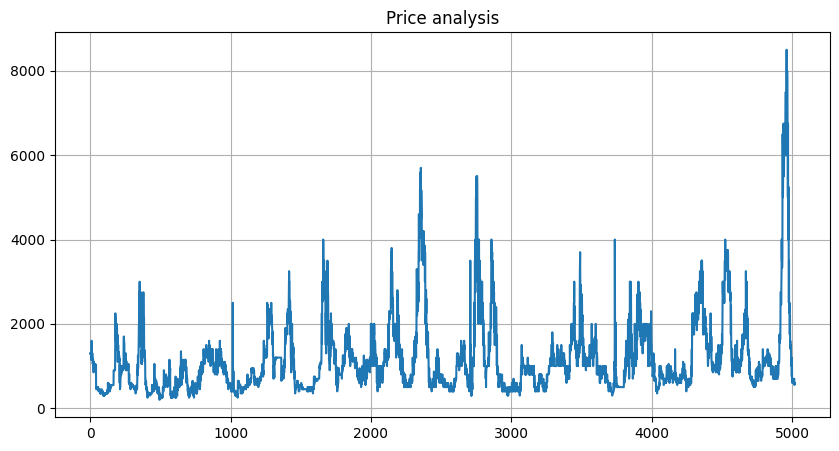

In [38]:
# Visualize
plt.figure(figsize=(10, 5))
plt.plot(df['Price'])
plt.title('Price analysis')
plt.grid(True)
plt.show();

In [39]:
df.describe(include ='all')

,Date,Arrival,Price
count,5017,5017.000000,5017.000000
mean,2016-11-15 00:00:00,161.125914,1161.181977
min,2010-01-03 00:00:00,0.100000,200.000000
25%,2013-06-10 00:00:00,111.000000,600.000000
50%,2016-11-15 00:00:00,147.700000,950.000000
75%,2020-04-22 00:00:00,194.000000,1350.000000
max,2023-09-28 00:00:00,2075.000000,8500.000000
std,NaN,97.563156,896.345939


In [40]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Price'])

In [41]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller
test_result1=adfuller(df['Price'].diff().dropna())
test_result1

(-12.073765765571434,
 2.315437653896153e-22,
 28,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 68588.61597139365)

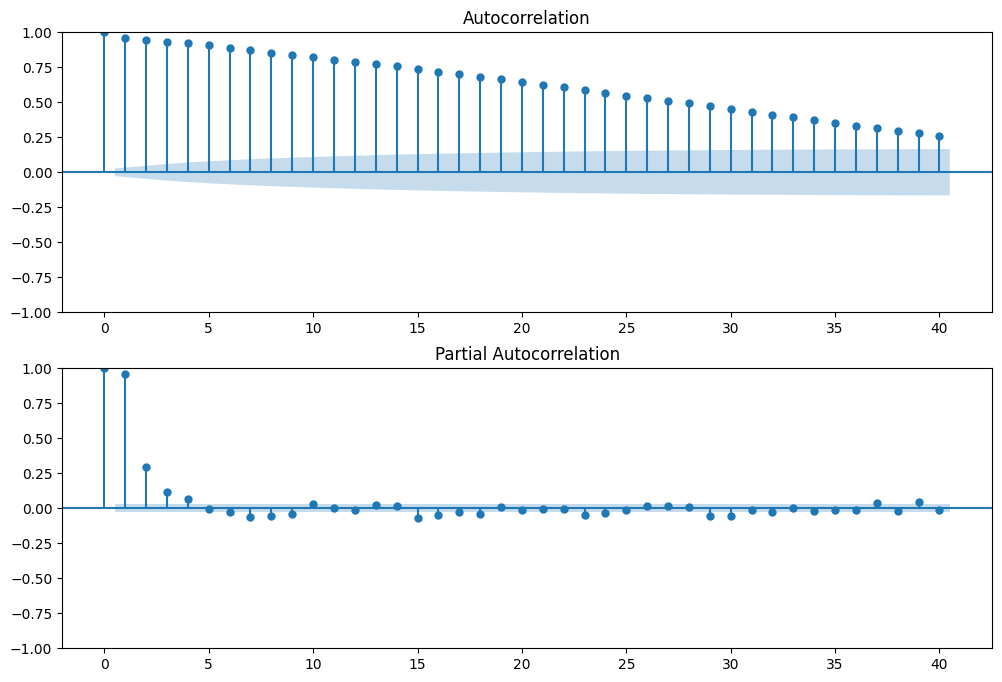

In [42]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Price'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Price'], lags=40, ax=ax2)
plt.show()

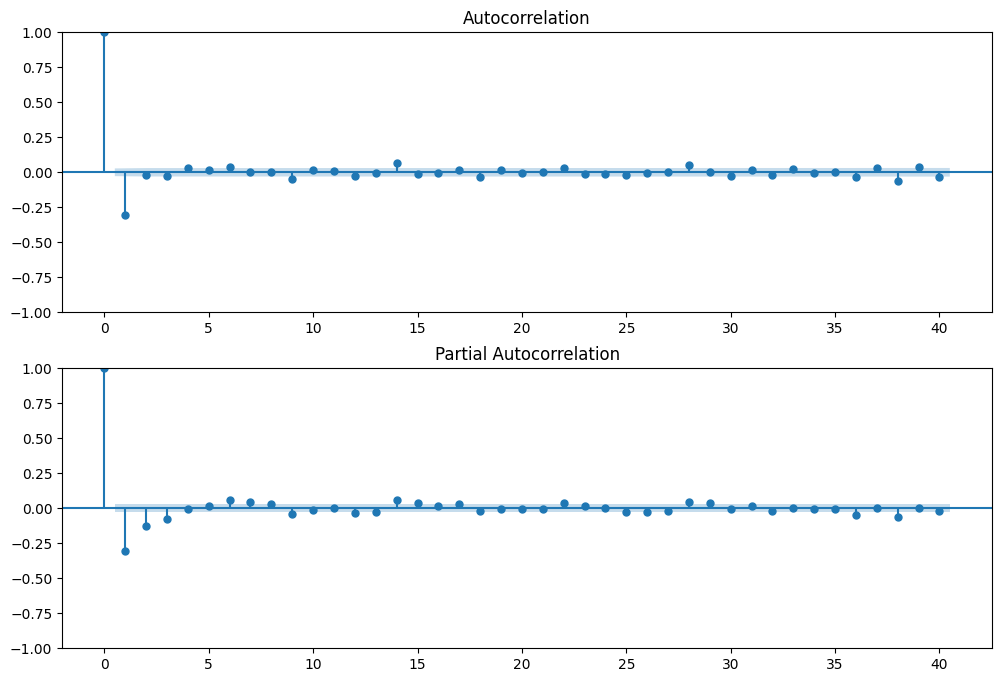

In [43]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#Plots with first order differenced Sales variable
fig = sm.graphics.tsa.plot_acf(df['Price'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Price'].diff().dropna(), lags=40, ax=ax2)
plt.show()

In [44]:
X = df['Price']
X = X.values
train, test = X[0:4017], X[4018:]

In [45]:
# %pip install pmdarima --quiet

In [46]:
from pmdarima.arima import auto_arima

In [47]:
arima_model = auto_arima(train,start_p=0, d=1, start_q=0,
max_p=3, max_d=3, max_q=3, start_P=0,
D=1, start_Q=0, max_P=3, max_D=3,
max_Q=3, m=1, seasonal=False,
error_action='warn',trace = True,
supress_warnings=True,stepwise = True,
random_state=20,n_fits = 50 ) 

# if seasonal=True than it is SARIMA model and seasonal=False than it is ARIMA model

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=55417.404, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=54986.081, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=54922.549, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=55415.405, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=54924.547, Time=1.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=54924.552, Time=1.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=54926.551, Time=1.65 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=54920.550, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=54922.548, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=54922.553, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=54984.082, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=54924.552, Time=0.73 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 6.577 seconds


In [48]:
#Summary of the model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4017
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -27458.275
Date:                Fri, 29 Nov 2024   AIC                          54920.550
Time:                        21:09:37   BIC                          54933.146
Sample:                             0   HQIC                         54925.014
                               - 4017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3626      0.006    -56.265      0.000      -0.375      -0.350
sigma2      5.087e+04    335.069    151.825      0.000    5.02e+04    5.15e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             75330.82
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.03   Skew:                             1.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

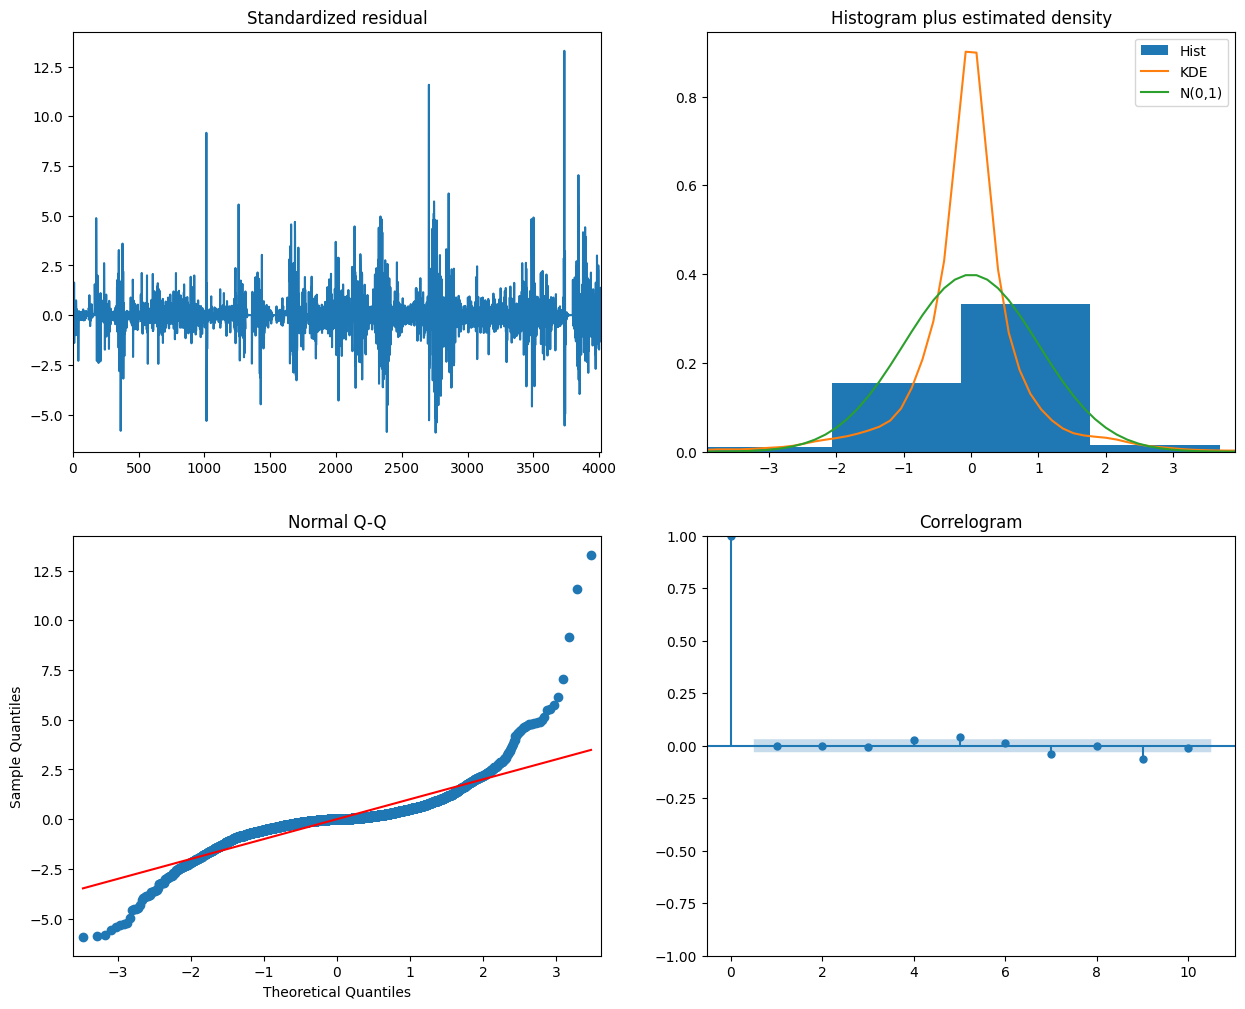

In [49]:
arima_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [50]:
# def forecast(ARIMA_model, periods=60):
#     # Forecast
#     n_periods = periods
#     fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
#     #pred = ARIMA_model.predict(n_periods=len(df["#y"]),dynamic=True)
#     index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(days=1), periods = n_periods, freq='D')

#     # make series for plotting purpose
#     fitted_series = pd.Series(fitted, index=index_of_fc)
#     lower_series = pd.Series(confint[:, 0], index=index_of_fc)
#     upper_series = pd.Series(confint[:, 1], index=index_of_fc)

#     # Plot
#     plt.figure(figsize=(15,7))
#     plt.plot(df["Price"], color='#1f76b4')
#     #plt.plot(pred, color='yellow')
#     plt.plot(fitted_series, color='darkgreen')
#     plt.fill_between(lower_series.index,
#     lower_series,
#     upper_series,
#     color='k', alpha=.15)

#     plt.title("ARIMA/SARIMA - Forecast")
#     plt.show()
    
# forecast(arima_model)

In [51]:
X = df['Price']
X = X.values
train_data_new = X[:4017]
test_data_new = X[4018:]

In [52]:
train_data_new = pd.DataFrame({'Date': df['Date'][:4017], 'Price': train_data_new})
test_data_new = pd.DataFrame({'Date': df['Date'][4018:], 'Price': test_data_new})

In [53]:
df['Date'] = pd.to_datetime(df['Date'])

In [54]:
from datetime import timedelta

In [55]:
from pmdarima.arima import auto_arima

In [56]:
# Make predictions on the training data
train_predictions_new, _ = arima_model.predict_in_sample(return_conf_int=True)

# Store the training predictions with dates
train_predictions_df_new = pd.DataFrame({'Date': train_data_new['Date'], 'Predicted_Price': train_predictions_new})
train_predictions_df_new.set_index('Date', inplace=True)

# Make predictions on the test data
test_predictions_new, conf_int =arima_model.predict(n_periods=len(test_data_new), return_conf_int=True)

# Store the test predictions with dates
test_predictions_df_new = pd.DataFrame({'Date': test_data_new['Date'], 'Predicted_Price': test_predictions_new})
test_predictions_df_new.set_index('Date', inplace=True)

# Forecast 10 steps ahead
forecast_steps = 100
forecast_new, conf_int_forecast =arima_model.predict(n_periods=forecast_steps, return_conf_int=True)

# Create a DataFrame for the forecasted values with future dates
future_dates = pd.date_range(df['Date'].max() + timedelta(days=1), periods=forecast_steps, freq='D')
forecast_df_new = pd.DataFrame({'Date': future_dates, 'Forecasted_Price': forecast_new})
forecast_df_new.set_index('Date', inplace=True)

In [57]:
train_data_new['Date'] = pd.to_datetime(train_data_new['Date'])
test_data_new['Date'] = pd.to_datetime(test_data_new['Date'])
train_predictions_df_new.index = pd.to_datetime(train_predictions_df_new.index)
test_predictions_df_new.index = pd.to_datetime(test_predictions_df_new.index)
forecast_df_new.index = pd.to_datetime(forecast_df_new.index)

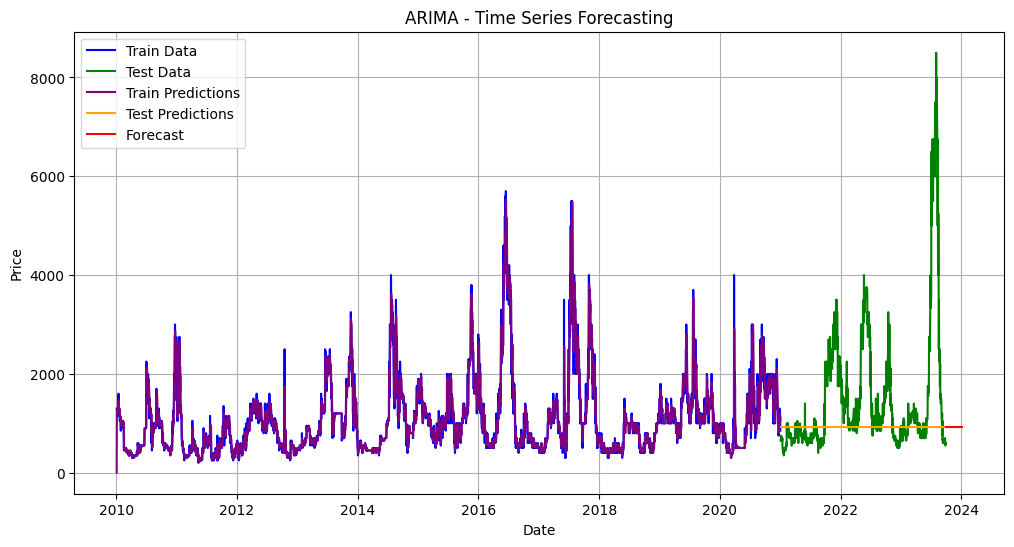

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_new['Date'], train_data_new['Price'], label='Train Data', color='blue')
plt.plot(test_data_new['Date'], test_data_new['Price'], label='Test Data', color='green')
plt.plot(train_predictions_df_new.index, train_predictions_df_new['Predicted_Price'], label='Train Predictions', color='purple')
plt.plot(test_predictions_df_new.index, test_predictions_df_new['Predicted_Price'], label='Test Predictions', color='orange')
plt.plot(forecast_df_new.index, forecast_df_new['Forecasted_Price'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('ARIMA - Time Series Forecasting')
plt.grid(True)
plt.show()

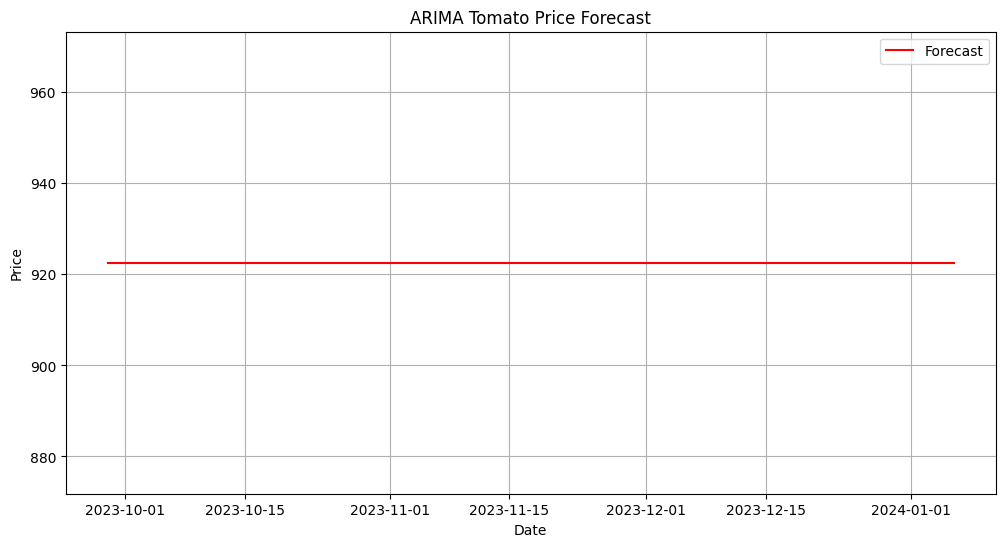

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_df_new.index, forecast_df_new['Forecasted_Price'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('ARIMA Tomato Price Forecast')
plt.grid(True)
plt.show()

In [80]:
from sklearn.metrics import mean_squared_error
import numpy as np

# True and predicted values
y_true = test_data_new["Price"]
y_pred = test_predictions_df_new

# Calculate MSE and RMSE
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Calculate the range of the target variable
y_range = np.max(y_true) - np.min(y_true)

# Calculate RMSE as a percentage of the range
rmse_percentage = (rmse / y_range) * 100

# Calculate NRMSE (normalized by mean of observed values)
nrmse = rmse / np.mean(y_true)

print(f'Root Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'RMSE as a percentage of the range: {rmse_percentage:.2f}%')
print(f'Normalized RMSE (NRMSE): {nrmse:.2f}')


Root Mean Squared Error (MSE): 1991440.42
Root Mean Squared Error (RMSE): 1411.18
RMSE as a percentage of the range: 17.32%
Normalized RMSE (NRMSE): 0.94


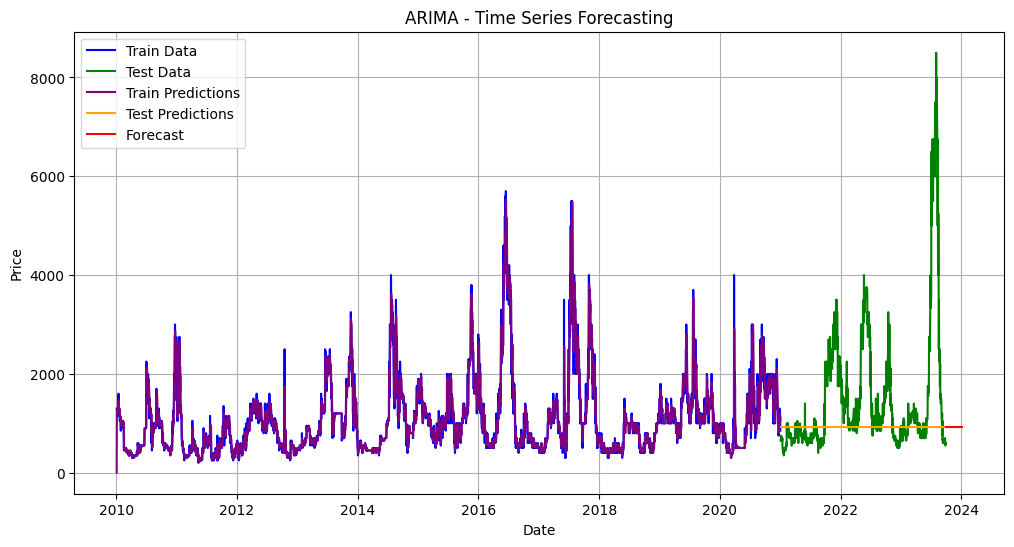

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_new['Date'], train_data_new['Price'], label='Train Data', color='blue')
plt.plot(test_data_new['Date'], test_data_new['Price'], label='Test Data', color='green')
plt.plot(train_predictions_df_new.index, train_predictions_df_new['Predicted_Price'], label='Train Predictions', color='purple')
plt.plot(test_predictions_df_new.index, test_predictions_df_new['Predicted_Price'], label='Test Predictions', color='orange')
plt.plot(forecast_df_new.index, forecast_df_new['Forecasted_Price'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('ARIMA - Time Series Forecasting')
plt.grid(True)
plt.show()

Mean Squared Error (MSE): 1823190.441814831
Root Mean Squared Error (RMSE): 1350.2556949758928
Mean Absolute Error (MAE): 759.6978233962434


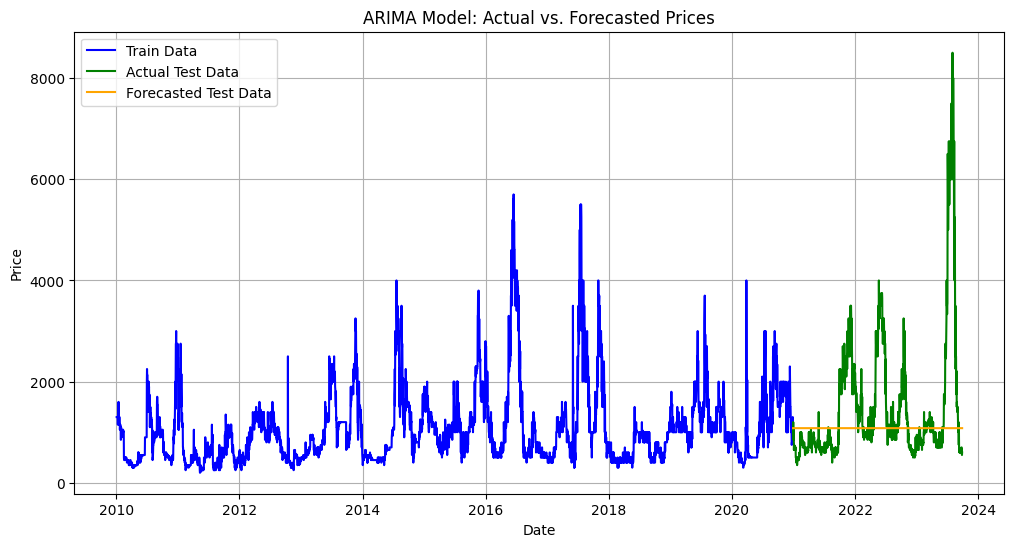

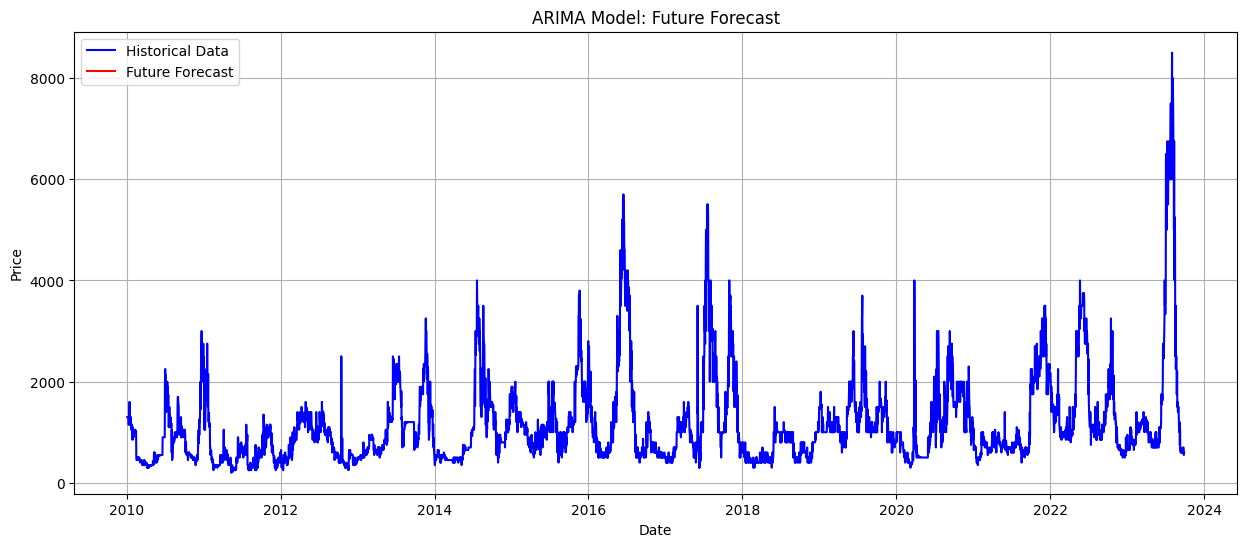

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load Data
data = pd.read_excel('D:/AAU/Module_4/Project_mo_4/pune_tomato_market.xlsx')
data.set_index('Date', inplace=True)

# Train-Test Split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit ARIMA Model
p, d, q = 2, 1, 2  # Set ARIMA order based on your analysis
arima_model = ARIMA(train['Price'], order=(p, d, q))
arima_fit = arima_model.fit()

# Forecast
forecast_steps = len(test)
forecast = arima_fit.forecast(steps=forecast_steps)

# Evaluation Metrics
mse = mean_squared_error(test['Price'], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['Price'], forecast)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

# Combine Test and Forecast for Visualization
results = test.copy()
results['Forecasted_Price'] = forecast

# Plot Actual vs. Forecasted
plt.figure(figsize=(12, 6))
plt.plot(train['Price'], label='Train Data', color='blue')
plt.plot(test['Price'], label='Actual Test Data', color='green')
plt.plot(results['Forecasted_Price'], label='Forecasted Test Data', color='orange')
plt.title('ARIMA Model: Actual vs. Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Forecasting Beyond Test Data
future_steps = 60  # Number of future days to forecast
future_forecast = arima_fit.forecast(steps=future_steps)
future_dates = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='D')[1:]
future_df = pd.DataFrame({'Forecasted_Price': future_forecast}, index=future_dates)

# Plot Future Forecast
plt.figure(figsize=(15, 6))
plt.plot(data['Price'], label='Historical Data', color='blue')
plt.plot(future_df['Forecasted_Price'], label='Future Forecast', color='red')
plt.title('ARIMA Model: Future Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [63]:
#nonsesonal
#Standard ARIMA Model
ARIMA_model = auto_arima(df['#y'],
                        start_p=1,
                        start_q=1,
                        test='adf', # use adftest to find optimal 'd'
                        max_p=3, max_q=3, # maximum p and q
                        m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                        d=None,# let model determine 'd'
                        seasonal=False, # No Seasonality for standard ARIMA
                        trace=True, #logs
                        error_action='warn', #shows errors ('ignore' silences these)
                        suppress_warnings=True,
                        stepwise=True, n_fits = 50 )
# SARIMAX Model
SARIMAX_model = auto_arima(df[['price']], exogenous=df[['arrival', 'CoC', 'CoP']],
                            start_p=0, d=1, start_q=0,
                            max_p=5, max_d=5, max_q=5, start_P=0,
                            D=1, start_Q=0, max_P=5, max_D=5,
                            max_Q=5, m=12, seasonal=True,
                            error_action='warn',trace = True,
                            supress_warnings=True,stepwise = True,
                            random_state=20,n_fits = 10)

KeyError: '#y'